**Malicious URL detection using Machine Learning**

**Shivani Donthi  222022502019**

**Srinath Tummala  222022502027** 

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'urldata.csv')
df

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450174,450174,http://atualizapj.com/,malicious,1


In [3]:
df.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [4]:
#Removing the unnamed columns as it is not necesary.
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [6]:
df.shape

(450176, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


**Checking Missing Values**

In [8]:
df.isnull().sum()

url       0
label     0
result    0
dtype: int64

**1. Data Preprocessing**

The following features will be extracted from the URL for classification.


##### 1.  Length Features

*   Length Of Url
*   Length of Hostname
*   Length Of Path
*   Length Of First Directory
*   Length Of Top Level Domain

##### 2. Count Features

*   Count Of '-'
*   Count Of '@'
*   Count Of '?'
*   Count Of '%'
*   Count Of '.'
*   Count Of '='
*   Count Of 'http'
*   Count Of 'www'
*   Count Of Digits
*   Count Of Letters
*   Count Of Number Of Directories


##### 3. Binary Features

* Use of IP or not
* Use of Shortening URL or not




































1.1 Length Features

In [9]:
#Importing dependencies
from urllib.parse import urlparse
import os.path

In [10]:
#Length of URL
df['url_length'] = df['url'].apply(lambda i: len(str(i)))

In [11]:
# print(len(str("https://www.youtube.com")))

In [12]:
#Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

In [13]:
# len(urlparse("https://www.youtube.com").netloc)

In [14]:
#Path Length = No.of Directories
df['path_length'] = df['url'].apply(lambda i: len(urlparse(i).path))

In [15]:
# len(urlparse("http://www.rosespa.com.sg/ipic/Dirk/index.php").path)

In [16]:
#First Directory Length = length of the first directory in the url path
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [17]:
# #First Directory Length
# url = "http://www.rosespa.com.sg/ipic/Dirk/index.php"
# def fd_length(url):
#     urlpath= urlparse(url).path
#     try:
#         return len(urlpath.split('/')[1])
#     except:
#         return 0

# fd_length(url)

In [18]:
pip install tld


Note: you may need to restart the kernel to use updated packages.


In [19]:
from tld import get_tld
#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [20]:
# url = "http://www.rosespa.com.sg/ipic/Dirk/index.php"
# tld = get_tld(url,fail_silently=True)
# def tld_length(tld):
#     try:
#         return len(tld)
#     except:
#         return -1
# print("Top Level Directory of 'http://www.rosespa.com.sg/ipic/Dirk/index.php' :",tld)
# print("Length of tld:", tld_length(tld))

In [21]:
df.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3


In [22]:
df.tail()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,11,25,8,com,3
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,13,139,2,com,3
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,13,127,2,com,3
450174,http://atualizapj.com/,malicious,1,22,14,1,0,com,3
450175,http://writeassociate.com/test/Portal/inicio/I...,malicious,1,143,18,118,4,com,3


In [23]:
df = df.drop("tld",1)

C:\Users\subha\AppData\Local\Temp\ipykernel_22668\2551734815.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("tld",1)


Dataset after extracting length features

**1.2 Count Features**


In [24]:
df['count-'] = df['url'].apply(lambda i: i.count('-'))


In [25]:
df['count@'] = df['url'].apply(lambda i: i.count('@'))

In [26]:
df['count?'] = df['url'].apply(lambda i: i.count('?'))

In [27]:
df['count%'] = df['url'].apply(lambda i: i.count('%'))

In [28]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))


In [29]:
df['count='] = df['url'].apply(lambda i: i.count('='))

In [30]:
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

In [31]:
df['count-https'] = df['url'].apply(lambda i : i.count('https'))

In [32]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))

In [33]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [34]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [35]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [36]:
no_of_dir("http://www.rosespa.com.sg/ipic/Dirk/index.php")

3

In [37]:
# import re
# def suspicious_words(url):
#     match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
#                       url)
#     if match:
#         return 1
#     else:
#         return 0
# df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

Data after extracting Count Features

In [38]:
df.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0


**1.3 Binary Features**

In [39]:
import re

In [40]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        #print match.group()
        return -1
    else:
#         print ("No matching pattern found")
        return 1
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [41]:
# having_ip_address("http://www.rosespa.com.sg/ipic/Dirk/index.php")

In [42]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
#         print("Url Shortened")
        return -1
    else:
        return 1
# df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [43]:
# shortening_service("https://tinyurl.com/4swk97wy")

Data after extracting Binary Features

In [44]:
df.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,...,0,2,0,1,1,1,0,17,0,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,...,0,2,0,1,1,1,0,18,0,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,...,0,2,0,1,1,1,0,19,0,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,...,0,2,0,1,1,1,0,16,0,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,...,0,2,0,1,1,1,0,20,0,1


**2. Data Visualization**

<AxesSubplot:>

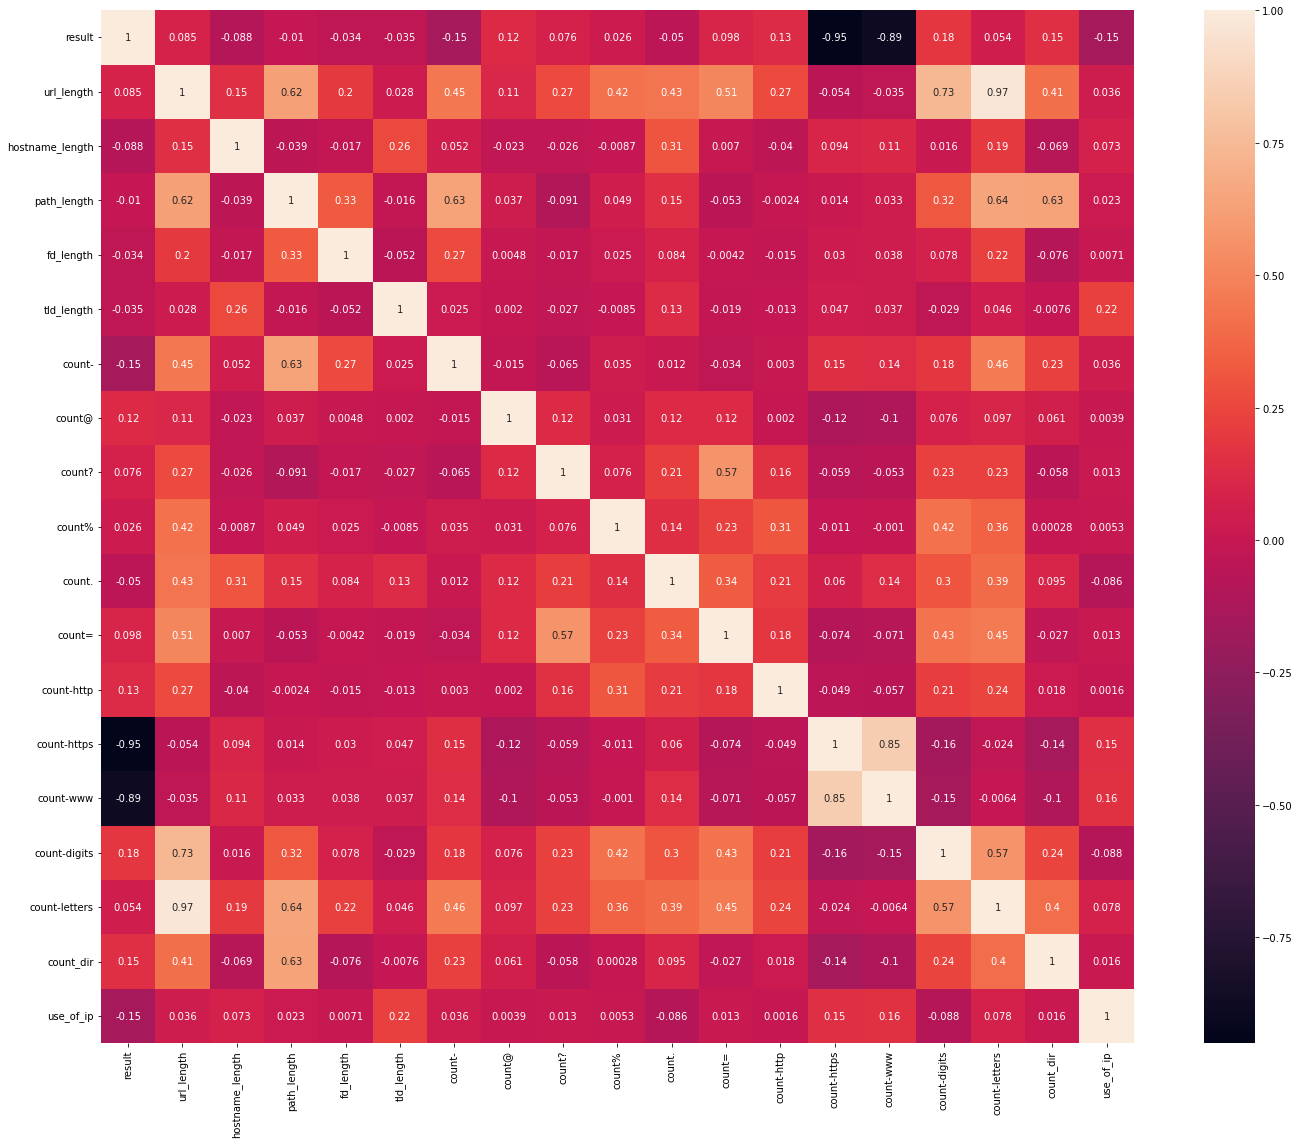

In [45]:
#Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

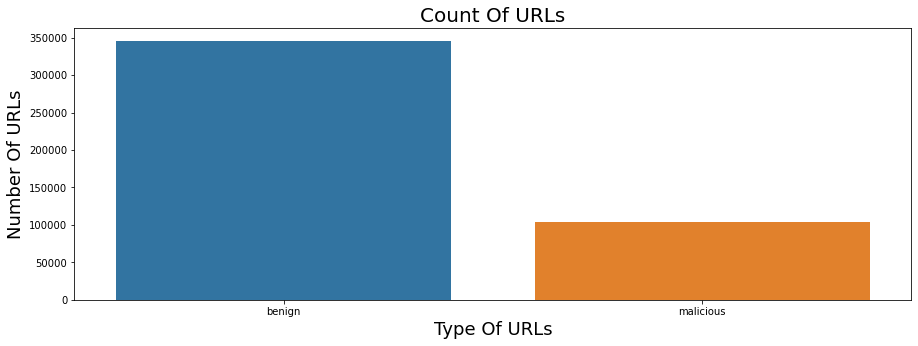

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=df)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [47]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(df[df['label']=='malicious'])/len(df['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(df[df['label']=='benign'])/len(df['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


The data shows a class imbalance to some extent.

In [48]:
class_count_0, class_count_1 = df['result'].value_counts()
print(class_count_0)
print(class_count_1)

345738
104438


In [49]:
X = np.array(df.drop('result',axis=1))
y = np.array(df['result'])

print(X.shape,y.shape)

(450176, 20) (450176,)


In [50]:
class_0 = df[df['result']==0]
class_1 = df[df['result']==1]

In [51]:
print(class_0.shape, class_1.shape)

(345738, 21) (104438, 21)


In [52]:
class_1_over = class_1.sample(class_count_0, replace=True)
class_1_over.shape

(345738, 21)

In [53]:
test_over = pd.concat([class_0, class_1_over], axis=0)

test_over.shape

(691476, 21)

In [54]:
test_over.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,...,0,2,0,1,1,1,0,17,0,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,...,0,2,0,1,1,1,0,18,0,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,...,0,2,0,1,1,1,0,19,0,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,...,0,2,0,1,1,1,0,16,0,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,...,0,2,0,1,1,1,0,20,0,1


C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


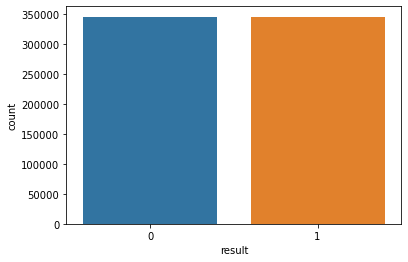

In [55]:
sns.countplot(test_over['result']);

**Now the data is balanced. We will take this data for our further study.** 

(0.0, 1000.0)

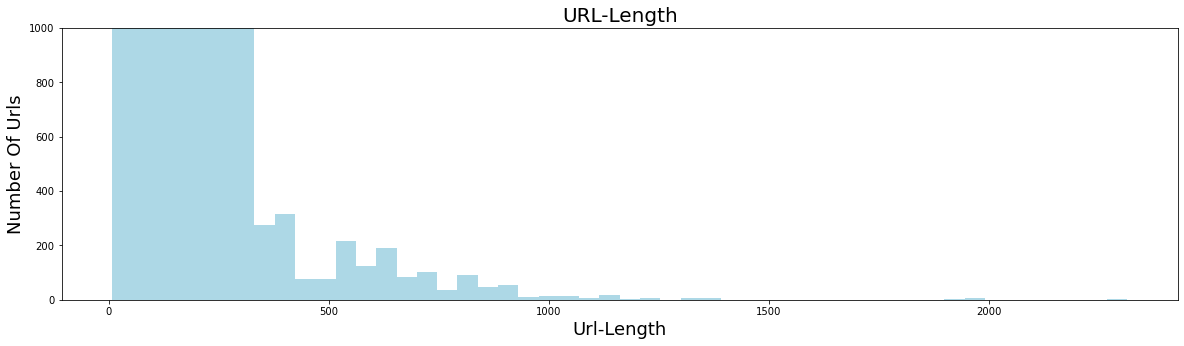

In [56]:
plt.figure(figsize=(20,5))
plt.hist(test_over['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

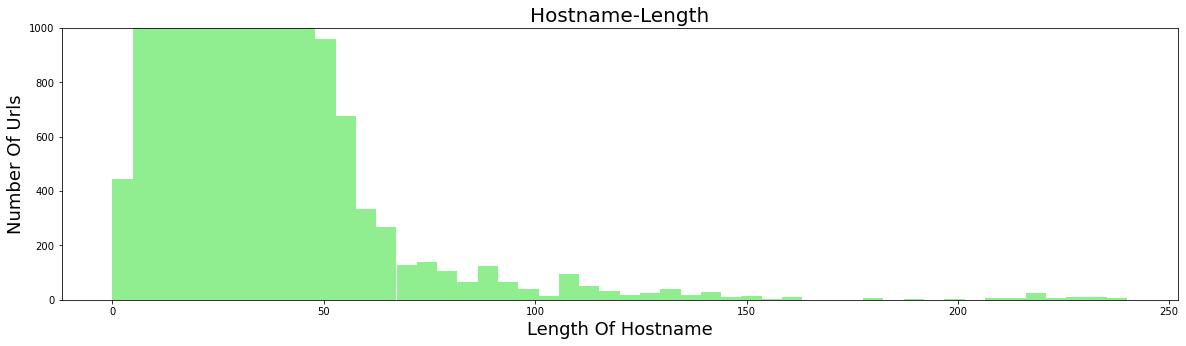

In [57]:
plt.figure(figsize=(20,5))
plt.hist(test_over['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

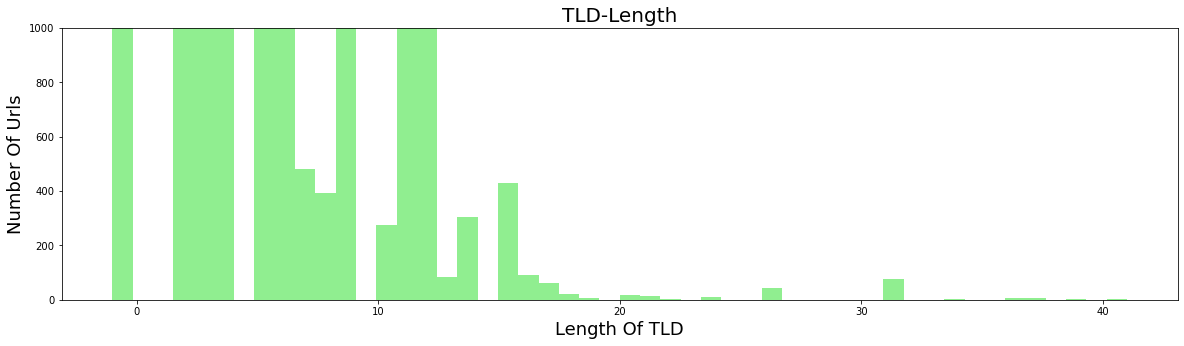

In [58]:
plt.figure(figsize=(20,5))
plt.hist(test_over['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

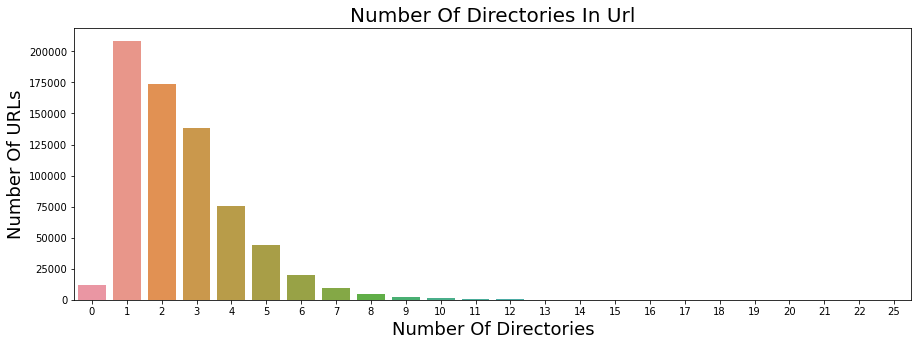

In [59]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=test_over)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

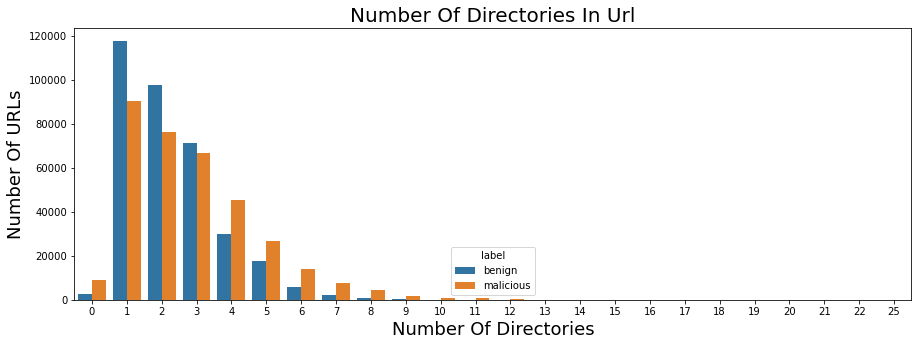

In [60]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=test_over,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of URLs')

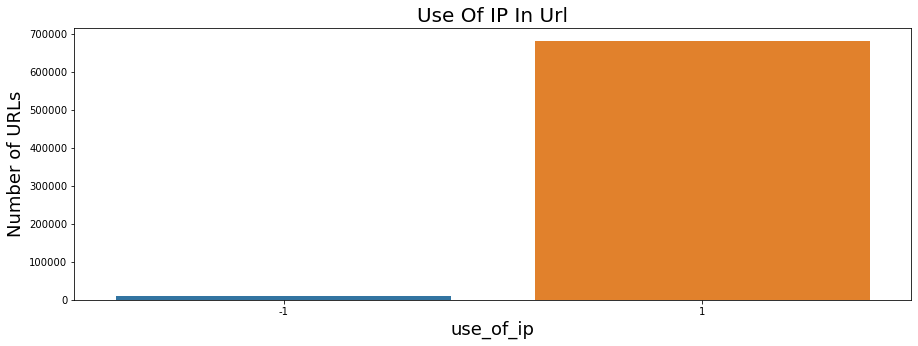

In [61]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(test_over['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of URLs')

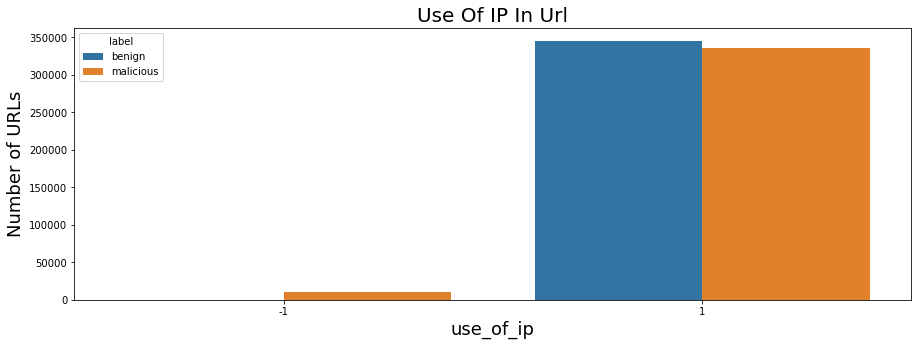

In [62]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(test_over['use_of_ip'],hue='label',data=test_over)
plt.ylabel("Number of URLs",fontsize=18)

C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of URLs')

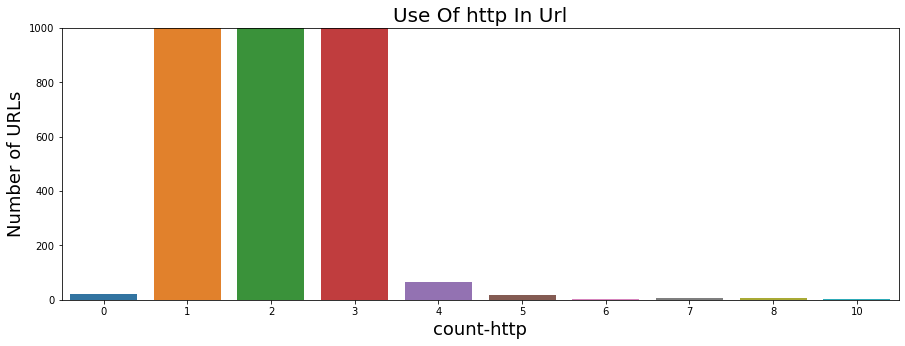

In [63]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(test_over['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of URLs')

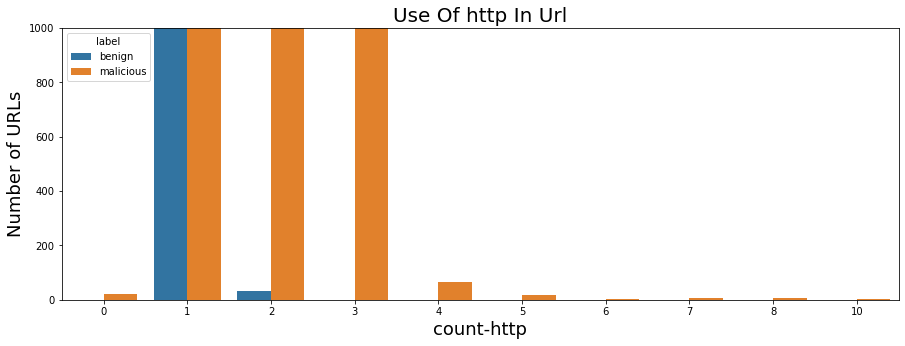

In [64]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(test_over['count-http'],hue='label',data=test_over)
plt.ylabel("Number of URLs",fontsize=18)

C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of URLs')

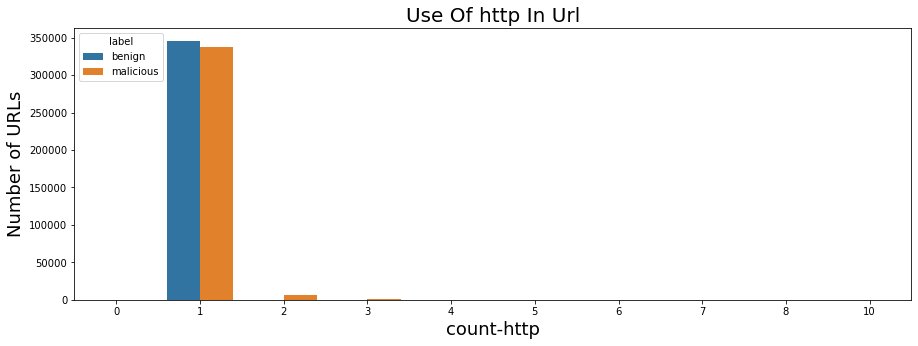

In [65]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(test_over['count-http'],hue='label',data=test_over)

plt.ylabel("Number of URLs",fontsize=18)

C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number Of URLs')

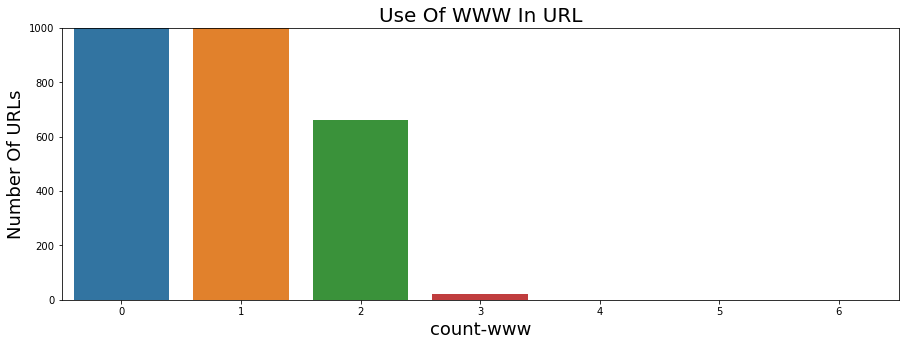

In [66]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(df['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number Of URLs')

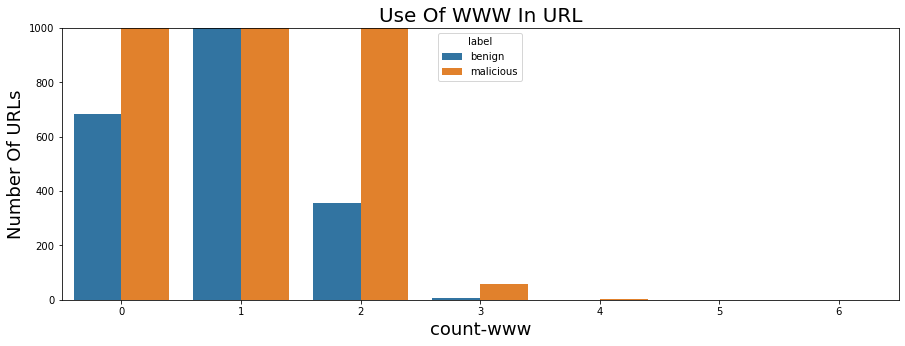

In [67]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(test_over['count-www'],hue='label',data=test_over)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

**Building Models Using Lexical Features Only**

In [68]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [69]:
#Predictor Variables
x = test_over[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y = test_over['result']

In [70]:
#Predictor Variables
x1 = df[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y1 = df['result']

In [71]:
x1.shape

(450176, 17)

In [72]:
y1.shape

(450176,)

In [73]:
x.shape


(691476, 17)

In [74]:
y.shape

(691476,)

In [107]:
#Splitting the data into Training and Testing
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
print("Before oversampling:")
print("Shape of x1_train: ", x1_train.shape)
print("Shape of x1_test: ", x1_test.shape)
print("Shape of y1_train: ", y1_train.shape)
print("Shape of y1_test: ", y1_test.shape)

Before oversampling:
Shape of x1_train:  (360140, 17)
Shape of x1_test:  (90036, 17)
Shape of y1_train:  (360140,)
Shape of y1_test:  (90036,)


In [108]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("After oversampling:")
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

After oversampling:
Shape of x_train:  (553180, 17)
Shape of x_test:  (138296, 17)
Shape of y_train:  (553180,)
Shape of y_test:  (138296,)


In [77]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
# #Decision Tree before over sampling
# dt_model1 = DecisionTreeClassifier()
# dt_model1.fit(x1_train,y1_train)

# dt_predictions1 = dt_model1.predict(x1_test)
# print(dt_model1.__class__.__name__,accuracy_score(y1_test,dt_predictions1))

In [79]:
# #Decision Tree after over sampling
# dt_model = DecisionTreeClassifier()
# dt_model.fit(x_train,y_train)

# dt_predictions = dt_model.predict(x_test)
# print(dt_model.__class__.__name__,accuracy_score(y_test,dt_predictions))

In [80]:
# cm = confusion_matrix(y_test, dt_predictions, labels=[0,1])
# plot_confusion_matrix(cm,classes=['benign', 'malicious'])

In [81]:
# #Random Forest before over sampling
# rfc1 = RandomForestClassifier()
# rfc1.fit(x1_train, y1_train)

# rfc_predictions1 = rfc1.predict(x1_test)
# print(rfc1.__class__.__name__,accuracy_score(y1_test, rfc_predictions1))

In [82]:
# #Random Forest afetr oversampling
# rfc = RandomForestClassifier()
# rfc.fit(x_train, y_train)

# rfc_predictions = rfc.predict(x_test)
# print(rfc.__class__.__name__,accuracy_score(y_test, rfc_predictions))

In [83]:
# cm = confusion_matrix(y_test, rfc_predictions, labels=[0,1])
# plot_confusion_matrix(cm,classes=['benign', 'malicious'])

In [84]:
# #Logistic Regression before oversampling
# log_model1 = LogisticRegression()
# log_model1.fit(x1_train,y1_train)

# log_predictions1 = log_model1.predict(x1_test)
# print(log_model1.__class__.__name__,accuracy_score(y1_test,log_predictions1))

In [85]:
# #Logistic Regression after over sampling
# log_model = LogisticRegression()
# log_model.fit(x_train,y_train)

# log_predictions = log_model.predict(x_test)
# print(log_model.__class__.__name__,accuracy_score(y_test,log_predictions))

In [86]:
# cm = confusion_matrix(y_test, log_predictions, labels=[0,1])
# plot_confusion_matrix(cm,classes=['benign', 'malicious'])

In [87]:
# #train data metrics
# training_acc = rfc.predict(x_train)
# print(classification_report(y_train,training_acc))


# score = accuracy_score(y_train, training_acc)
# print("accuracy:   %0.3f" % score)

In [88]:
# #test data metrics 
# y_pred = rfc.predict(x_test)
# print(classification_report(y_test,y_pred))


# score = accuracy_score(y_test, y_pred)
# print("accuracy:   %0.3f" % score)

In [89]:
# # 5-fold cross-validation before oversampling
# from sklearn.model_selection import cross_val_score

# print(cross_val_score(rfc1, x1, y1, cv=5, scoring='accuracy').mean())  

In [90]:
# # 5-fold cross-validation after oversampling
# from sklearn.model_selection import cross_val_score

# print(cross_val_score(rfc, x, y, cv=5, scoring='accuracy').mean())  

In [91]:
from sklearn.ensemble import RandomForestClassifier


In [92]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
#before oversampling
est_AB1 = AdaBoostClassifier()


est_RF1 = RandomForestClassifier()


est_Ensemble1 = VotingClassifier(estimators=[('AB1', est_AB1), ('RF1', est_RF1)],
                        voting='soft')

score_Ensemble1=est_Ensemble1.fit(x1,y1).score(x1_train,y1_train)

In [93]:
#after oversampling
est_AB = AdaBoostClassifier()


est_RF = RandomForestClassifier()


est_Ensemble = VotingClassifier(estimators=[('AB', est_AB), ('RF', est_RF)],
                        voting='soft')

score_Ensemble=est_Ensemble.fit(x,y).score(x_train,y_train)

In [94]:
from sklearn.metrics import accuracy_score
print("before oversampling:")
for est1 in (est_AB1, est_RF1, est_Ensemble1 ):
    est1.fit(x1, y1)
    y_pred1 = est1.predict(x1_test)
    print(est1.__class__.__name__, accuracy_score(y1_test, y_pred1))

before oversampling:
AdaBoostClassifier 0.9964791861033364
RandomForestClassifier 0.9992891732196011
VotingClassifier 0.9993224932249323


In [95]:
print("after oversampling:")
for est in (est_AB, est_RF, est_Ensemble ):
    est.fit(x, y)
    y_pred = est.predict(x_test)
    print(est.__class__.__name__, accuracy_score(y_test, y_pred))

after oversampling:
AdaBoostClassifier 0.9950685486203505
RandomForestClassifier 0.9990744490079251
VotingClassifier 0.9990889107421762


In [96]:
#Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test,y_pred))
cm.columns = ['Predicted 0', 'Predicted 1']
cm = cm.rename(index = {0:'Actual 0',1:'Actual 1'})
cm

,Predicted 0,Predicted 1
Actual 0,69011,52
Actual 1,74,69159


In [98]:
#train data metrics
training_acc = est.predict(x_train)
print(classification_report(y_train,training_acc))


score = accuracy_score(y_train, training_acc)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276675
           1       1.00      1.00      1.00    276505

    accuracy                           1.00    553180
   macro avg       1.00      1.00      1.00    553180
weighted avg       1.00      1.00      1.00    553180

accuracy:   0.999


In [100]:
#test data metrics 
y_pred = est.predict(x_test)
print(classification_report(y_test,y_pred))


score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69063
           1       1.00      1.00      1.00     69233

    accuracy                           1.00    138296
   macro avg       1.00      1.00      1.00    138296
weighted avg       1.00      1.00      1.00    138296

accuracy:   0.999


In [101]:
# 5-fold cross-validation before oversampling
from sklearn.model_selection import cross_val_score
print("before oversampling:")
print(cross_val_score(est1, x1, y1, cv=5, scoring='accuracy').mean())  

before oversampling:
0.9910568751649425


In [102]:
# 5-fold cross-validation after oversampling
from sklearn.model_selection import cross_val_score
print("after oversampling:")
print(cross_val_score(est, x, y, cv=5, scoring='accuracy').mean())  

after oversampling:
0.9941559986118156


Confusion matrix, without normalization


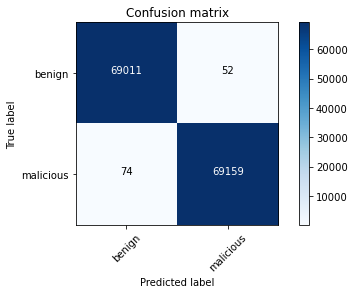

In [103]:
import itertools
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm,classes=['benign', 'malicious'])

In [104]:
import win32api

#1=-
#2=@
#3=?
#4=%
#5=.
#6= (=)
#7= 'http'
#8='https'
#9='www'
def features(i):
    url_length=len(str(i))
    hostname_length=len(urlparse(i).netloc)
    path_length=len(urlparse(i).path)
    fd_len=fd_length(i)
    tld_len=tld_length(i)
    
    #count features
    count_1=i.count('-')
    count_2=i.count('@')
    count_3=i.count('?')
    count_4=i.count('%')
    count_5=i.count('.')
    count_6=i.count('=')
    count_7=i.count('http')
    count_8=i.count('https')
    count_9=i.count('www')
    count_digits=digit_count(i)
    count_letters=letter_count(i)
    count_dir=no_of_dir(i)
    #count_sus=suspicious_words(i)
    
    
    #binary features
    use_of_ip=having_ip_address(i)
    short_url=shortening_service(i)
    
    feat= np.array([hostname_length,path_length,fd_len,tld_len,count_1,count_2,
                count_3,count_4,count_5,count_6,count_7,count_8,count_9,count_digits,
                count_letters,count_dir,use_of_ip]).reshape((1,-1))
    
    
    
    
    output=est.predict(feat)
    
    if output == 1:
        return win32api.MessageBox(0, '!!!! Avoid clicking on such URLs, proceed with caution !!!!', 'Malicious Alert!!!')
    
    else:
        return win32api.MessageBox(0, 'Happy browsing!', 'Safe URL')



In [114]:
user_input = input("Enter the URL :- ")
print(" \n")
features(user_input)

Enter the URL :- https://www.royalenfield.com/
 



C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\envs\srinath\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
# http://atualizapj.com/
# https://www.youtube.com